In [1]:
import torch
from torch.autograd import Variable
from torch import nn
import numpy as np

In [5]:
from torch.utils.data import TensorDataset # 텐서데이터셋
from torch.utils.data import DataLoader # 데이터로더

## Data Load

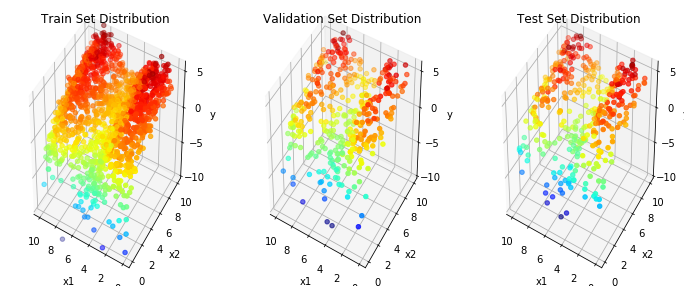

In [78]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
# ====== Generating Dataset ====== #
num_data = 2400
x1 = np.random.rand(num_data) * 10
x2 = np.random.rand(num_data) * 10
e = np.random.normal(0, 0.5, num_data)
X = np.array([x1, x2]).T
y = 2*np.sin(x1) + np.log(0.5*x2**2) + e
# ====== Split Dataset into Train, Validation, Test ======#
train_X, train_Y = X[:1600, :], y[:1600]
val_X, val_Y = X[1600:2000, :], y[1600:2000]
test_X, test_Y = X[2000:, :], y[2000:]
# ====== Visualize Each Dataset ====== #
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
ax1.scatter(train_X[:, 0], train_X[:, 1], train_Y, c=train_Y, cmap='jet')

ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_zlabel('y')
ax1.set_title('Train Set Distribution')
ax1.set_zlim(-10, 6)
ax1.view_init(40, -60)
ax1.invert_xaxis()

ax2 = fig.add_subplot(1, 3, 2, projection='3d')
ax2.scatter(val_X[:, 0], val_X[:, 1], val_Y, c=val_Y, cmap='jet')

ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.set_zlabel('y')
ax2.set_title('Validation Set Distribution')
ax2.set_zlim(-10, 6)
ax2.view_init(40, -60)
ax2.invert_xaxis()

ax3 = fig.add_subplot(1, 3, 3, projection='3d')
ax3.scatter(test_X[:, 0], test_X[:, 1], test_Y, c=test_Y, cmap='jet')

ax3.set_xlabel('x1')
ax3.set_ylabel('x2')
ax3.set_zlabel('y')
ax3.set_title('Test Set Distribution')
ax3.set_zlim(-10, 6)
ax3.view_init(40, -60)
ax3.invert_xaxis()

plt.show()

In [79]:
train_X.shape

(1600, 2)

In [80]:
train_x, train_y = Variable(torch.from_numpy(train_X)), Variable(torch.from_numpy(train_Y))
val_x, val_y = Variable(torch.from_numpy(val_X)), Variable(torch.from_numpy(val_Y))
test_x, test_y = Variable(torch.from_numpy(test_X)), Variable(torch.from_numpy(test_Y))

In [84]:
dataset = TensorDataset(train_x, train_y)
dataloader = DataLoader(dataset, batch_size=800, shuffle=True)

In [85]:
model = nn.Linear(2,1,bias=True)
cost_func = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5) 

In [86]:
num_epochs = 1000
for epoch in range(num_epochs):
    for batch_idx, samples in enumerate(dataloader):

        batch_x, batch_y = samples
        
        prediction = model(batch_x.float())
        cost = cost_func(prediction, batch_y.float())

        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        
        if epoch % 200 == 0:
            print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(
                epoch, num_epochs, batch_idx+1, len(dataloader),
                cost.item()
                ))

C:\Users\Lucius\anaconda3\envs\myenv\lib\site-packages\torch\nn\modules\loss.py:431: UserWarning: Using a target size (torch.Size([800])) that is different to the input size (torch.Size([800, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch    0/4000 Batch 1/2 Cost: 11.528473
Epoch    0/4000 Batch 2/2 Cost: 11.792763
Epoch  200/4000 Batch 1/2 Cost: 9.150055
Epoch  200/4000 Batch 2/2 Cost: 8.934157
Epoch  400/4000 Batch 1/2 Cost: 8.043679
Epoch  400/4000 Batch 2/2 Cost: 7.971036
Epoch  600/4000 Batch 1/2 Cost: 7.250368
Epoch  600/4000 Batch 2/2 Cost: 7.945065
Epoch  800/4000 Batch 1/2 Cost: 7.009348
Epoch  800/4000 Batch 2/2 Cost: 7.817626
Epoch 1000/4000 Batch 1/2 Cost: 7.423499
Epoch 1000/4000 Batch 2/2 Cost: 7.222789


KeyboardInterrupt: 